# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import *
from sklearn.preprocessing import *

# Input data - dropping date and bitcoin opening, high and low prices

In [2]:
data = pd.read_csv('/home/hoangbaoan1901/Development/predictive-analysis/Homeworks/week-3-btl/datasets/jrfm-2156907-cleaned.csv')

In [3]:
data = data.drop(columns=['Date', 'BTC_Open', 'BTC_High', 'BTC_Low'])

In [4]:
data.head()

,BTC_Close,BTC_Volume,Active Addr Cnt,Xfer Cnt,Mean Tx Size (native units),Total Fees (USD),Mean Hash Rate,Difficulty,Mean Block Size (in bytes),Sum Block Weight,...,RUB,Tweets,Google,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,279.584991,42484800.0,283150,497302,2.057514,7235.134845,356031.3023,5.227830e+10,506395.1825,277504560,...,64.480003,47467,90.000000,0,0,0,0,1,0,0
1,260.997009,58533000.0,266587,284532,3.675623,5806.842316,420413.4050,5.269984e+10,344357.2919,221766096,...,64.480003,29031,91.578947,0,0,0,0,0,1,0
2,265.083008,23789600.0,262571,276720,4.201519,4952.554125,372000.7193,5.269984e+10,362518.6127,205910572,...,64.480003,27132,91.578947,0,0,0,0,0,0,1
3,264.470001,20979400.0,292834,304538,3.463212,7563.840456,437493.8037,5.269984e+10,448765.0778,299775072,...,64.480003,27744,96.315789,1,0,0,0,0,0,0
4,270.385986,25433900.0,271613,280398,3.785274,7128.842169,424395.1868,5.269984e+10,414812.5617,268798540,...,62.889999,26653,104.210526,0,1,0,0,0,0,0


In [5]:
data.shape

(2430, 44)

In [6]:
data.isna().sum()

BTC_Close                      0
BTC_Volume                     0
Active Addr Cnt                0
Xfer Cnt                       0
Mean Tx Size (native units)    0
Total Fees (USD)               0
Mean Hash Rate                 0
Difficulty                     0
Mean Block Size (in bytes)     0
Sum Block Weight               0
LTC                            0
XRP                            0
DASH                           0
DOGE                           0
ETH                            0
Gold                           0
Silver                         0
Copper                         0
Oil                            0
Treasury Yield 10 Years        0
S&P500                         0
DJI                            0
CBOE                           0
NASDAQ                         0
JP225                          0
CSI300                         0
DXY                            0
EUR                            0
GBP                            0
JPY                            0
CAD       

In [7]:
# Add a column to indicate if BTC_Close increased (1) or decreased (0) compared to the previous day
data['BTC_Close_Change'] = data['BTC_Close'].diff().apply(lambda x: 1 if x > 0 else 0)
data['BTC_Close_Change'].iloc[0] = 0  # Set the first value to 0 as there's no previous day to compare

data.head()

/tmp/ipykernel_103426/1193933127.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['BTC_Close_Change'].iloc[0] = 0  # Set the first value to 0 as there's no previous day to compare
/tmp/ipykernel_103426/1193933127.py:3: SettingWithCop

,BTC_Close,BTC_Volume,Active Addr Cnt,Xfer Cnt,Mean Tx Size (native units),Total Fees (USD),Mean Hash Rate,Difficulty,Mean Block Size (in bytes),Sum Block Weight,...,Tweets,Google,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,BTC_Close_Change
0,279.584991,42484800.0,283150,497302,2.057514,7235.134845,356031.3023,5.227830e+10,506395.1825,277504560,...,47467,90.000000,0,0,0,0,1,0,0,0
1,260.997009,58533000.0,266587,284532,3.675623,5806.842316,420413.4050,5.269984e+10,344357.2919,221766096,...,29031,91.578947,0,0,0,0,0,1,0,0
2,265.083008,23789600.0,262571,276720,4.201519,4952.554125,372000.7193,5.269984e+10,362518.6127,205910572,...,27132,91.578947,0,0,0,0,0,0,1,1
3,264.470001,20979400.0,292834,304538,3.463212,7563.840456,437493.8037,5.269984e+10,448765.0778,299775072,...,27744,96.315789,1,0,0,0,0,0,0,0
4,270.385986,25433900.0,271613,280398,3.785274,7128.842169,424395.1868,5.269984e+10,414812.5617,268798540,...,26653,104.210526,0,1,0,0,0,0,0,1


# Split data into train and test set

In [8]:
# Define train size, test size = 1 - train size
train_size = int(len(data) * 0.8)
train_set = data.iloc[:train_size]
test_set = data.iloc[train_size:]

# Regression solution

In [9]:
# Define the target variable
target = 'BTC_Close'

# Create the feature sets
X_train = train_set.drop(columns=[target, 'BTC_Close_Change'])
X_test = test_set.drop(columns=[target, 'BTC_Close_Change'])

# Create the target sets
Y_train = train_set[target]
Y_test = test_set[target]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1944, 43)
X_test shape: (486, 43)
Y_train shape: (1944,)
Y_test shape: (486,)


Mean Squared Error: 305674442.92321265
R2 Score: -1.6935609963316716


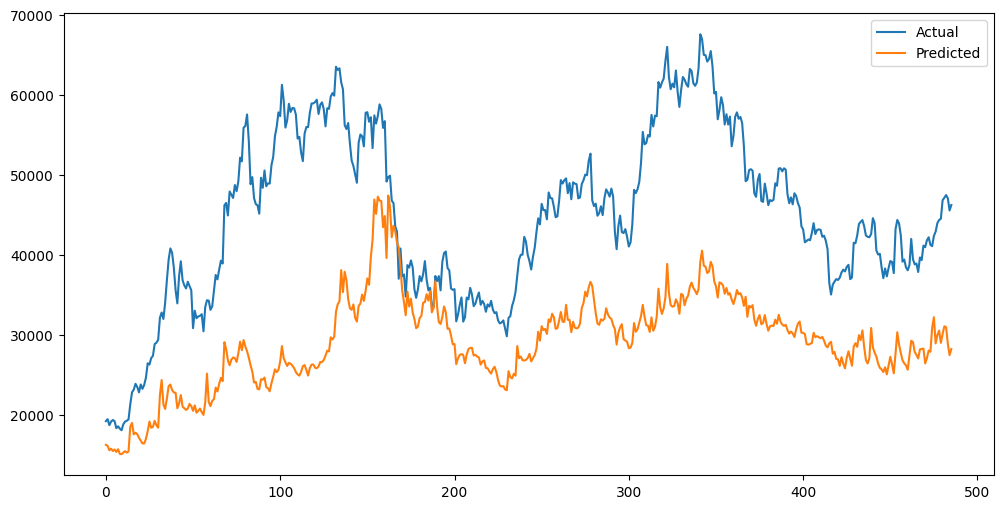

In [10]:
lg_model = LinearRegression()
lg_model.fit(X_train, Y_train)

Y_pred = lg_model.predict(X_test)

# Calculate the Mean Squared Error
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Calculate the R2 score
r2 = sklearn.metrics.r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(Y_test.values, label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.legend()
plt.show()

Mean Squared Error (Polynomial): 361275561.364183
R2 Score (Polynomial): -2.183510376962873


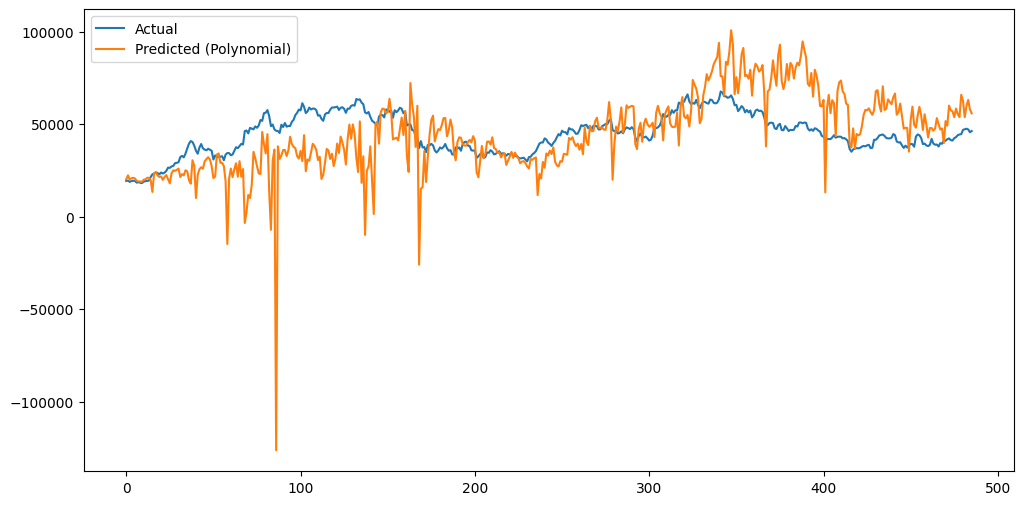

In [11]:
pl_model = PolynomialFeatures(degree=2)
X_train_poly = pl_model.fit_transform(X_train)
X_test_poly = pl_model.fit_transform(X_test)
quadratic_model = LinearRegression()

quadratic_model.fit(X_train_poly, Y_train)
Y_pred_poly = quadratic_model.predict(X_test_poly)

# Calculate the Mean Squared Error
mse_poly = sklearn.metrics.mean_squared_error(Y_test, Y_pred_poly)
print("Mean Squared Error (Polynomial):", mse_poly)

# Calculate the R2 score
r2_poly = sklearn.metrics.r2_score(Y_test, Y_pred_poly)
print("R2 Score (Polynomial):", r2_poly)

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(Y_test.values, label='Actual')
plt.plot(Y_pred_poly, label='Predicted (Polynomial)')
plt.legend()
plt.show()

# Classification (Decrease or Increase price) solution

In [12]:
# Define the target variable
target = 'BTC_Close_Change'

# Create the feature sets
X_train = train_set.drop(columns=[target, 'BTC_Close'])
X_test = test_set.drop(columns=[target, 'BTC_Close'])

# Create the target sets
Y_train = train_set[target]
Y_test = test_set[target]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1944, 43)
X_test shape: (486, 43)
Y_train shape: (1944,)
Y_test shape: (486,)


/home/hoangbaoan1901/Development/predictive-analysis/Homeworks/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.49176954732510286
Confusion Matrix:
[[121 110]
 [137 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.52      0.49       231
           1       0.52      0.46      0.49       255

    accuracy                           0.49       486
   macro avg       0.49      0.49      0.49       486
weighted avg       0.49      0.49      0.49       486

ROC AUC Score: 0.4758339699516171


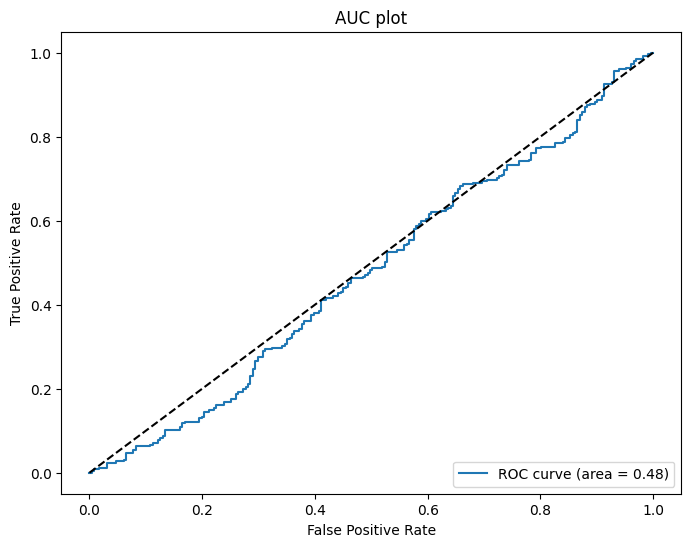

In [13]:
lgr = LogisticRegression()
lgr.fit(X_train, Y_train)

Y_pred = lgr.predict(X_test)

# Calculate the accuracy
accuracy = sklearn.metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_matrix = sklearn.metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

# Calculate the classification report
classification_report = sklearn.metrics.classification_report(Y_test, Y_pred)
print("Classification Report:")
print(classification_report)

# Calculate the ROC AUC score
roc_auc = sklearn.metrics.roc_auc_score(Y_test, lgr.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# Plot the ROC curve
fpr, tpr, _ = sklearn.metrics.roc_curve(Y_test, lgr.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC plot')
plt.legend(loc='lower right')
plt.show()